階層型クラスタリングのシミュレーション
下記手法を実装
- 凝集型クラスタリング
    - 単連結型
    - 群平均型
    - 完全連結型
    - ウォード法
- 分割型クラスタリング
    - Macnaughton Smith(1965)の手法

# 前準備

## import

In [10]:
# 必要なライブラリーのインストール
import numpy as np
import pandas as pd

# 可視化
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set_style('whitegrid')

# 正規化のためのクラス
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

## データ取得

In [11]:
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/SchoolScore.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'SchoolScore.txt')

('SchoolScore.txt', <http.client.HTTPMessage at 0x1f18382cb50>)

In [12]:
df = pd.read_csv("SchoolScore.txt", sep='\t', na_values=".", index_col=["Student"]) # データの読み込み

In [13]:
# 確認
display(df.head(5))
print(df.shape)

,Japanese,Math,English
Student,,,
0,80,85,100
1,96,100,100
2,54,83,98
3,80,98,98
4,90,92,91


(37, 3)


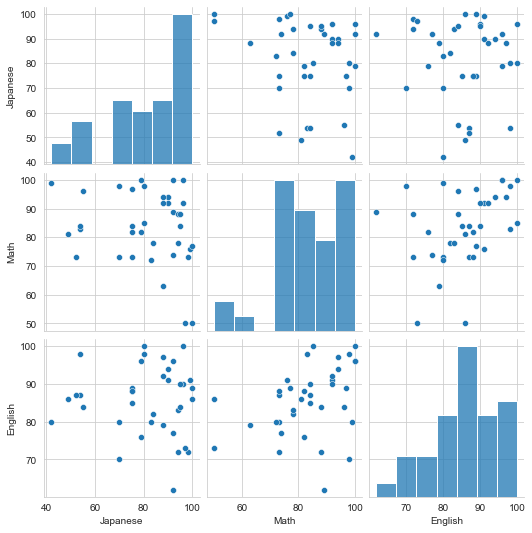

In [14]:
pg = sns.pairplot(df)

# 凝集型クラスタリング

## 単連結型

In [15]:
Z_single = linkage(df, method="single")

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [5.0, 5.0, 24.375, 24.375],
  [85.0, 85.0, 95.0, 95.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [235.0, 235.0, 253.75, 253.75],
  [220.0, 220.0, 244.375, 244.375],
  [285.0, 285.0, 295.0, 295.0],
  [232.1875, 232.1875, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [261.09375, 261.09375, 321.25, 321.25],
  [192.5, 192.5, 291.171875, 291.171875],
  [162.5, 162.5, 241.8359375, 241.8359375],
  [123.75, 123.75, 202.16796875, 202.16796875],
  [105.0, 105.0, 162.9

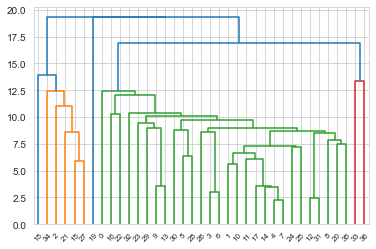

In [16]:
dendrogram(Z_single, labels=df.index)

## 群平均型

In [17]:
Z_ave = linkage(df, method="average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [63.75, 63.75, 100.0, 100.0],
  [32.5, 32.5, 81.875, 81.875],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [57.1875, 57.1875, 123.75, 123.75],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [182.5, 182.5, 220.0, 220.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [245.0, 245.0, 271.25, 271.25],
  [201.25, 201.25, 258.125, 258.125],
  [160.0, 160.0, 229.6875, 229.6875],
  [90.46875, 90.46875, 194.84375, 194.84375],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 

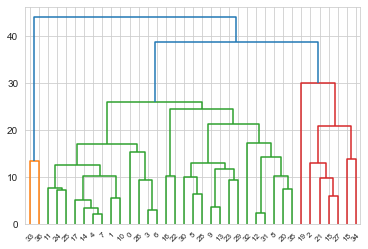

In [18]:
dendrogram(Z_ave, labels=df.index)

## 完全連結型

In [19]:
Z_com = linkage(df, method="complete")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [140.0, 140.0, 170.0, 170.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [155.0, 155.0, 203.75, 203.75],
  [101.25, 101.25, 179.375, 179.375],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [272.5, 272.5, 310.0, 310.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [291.25, 291.25, 3

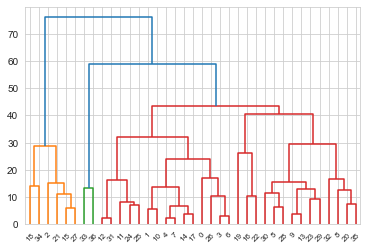

In [20]:
dendrogram(Z_com, labels=df.index)

## ウォード法

In [21]:
Z_ward = linkage(df, method="ward")

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [95.0, 95.0, 143.75, 143.75],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [202.5, 202.5, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [315.0, 315.0, 325.0, 325.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [320.0, 320.0, 343.75, 343.75],
  [281.25, 281.25, 331.875, 

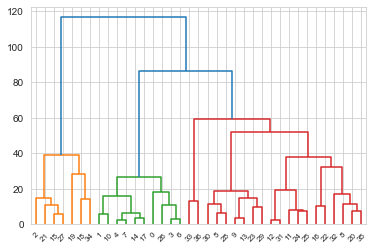

In [22]:
dendrogram(Z_ward, labels=df.index)

## 評価

### コンパクト性の評価
【評価方法】
横軸：併合の回数×縦軸：各クラスタの最大半径の平均
完全連結型は単連結型よりもコンパクトになりやすい。そのため、折れ線グラフを描いたときに、完全連結型の線は単連結型の線よりも下に来ると考えられる

In [76]:
# クラスタの最大半径の平均を出す関数
def ave_maxd(d, Z, D):
    """
    d : float, デンドログラムの高さ
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    
    # クラスタリング結果
    cluster_result = fcluster(Z, t=d , criterion="distance")
    
    # 各クラスタ内の最大半径を計算
    d_max_list = []
    for i in range(1, max(cluster_result)+1):
        cluster_i = np.where(cluster_result == i)
        d_max = D[np.ix_(cluster_i[0], cluster_i[0])].max()
        d_max_list.append(d_max)
        
    # クラスタの最大半径の平均を返す
    return [np.mean(d_max_list), np.max(d_max_list)]

In [77]:
# 距離行列の作成
df_nparray = np.array(df)
combination_df = df_nparray-df_nparray[:, np.newaxis]
d_matrix = np.array([[np.linalg.norm(combination_df[i, j]) for i in range(0, len(df_nparray))] for j in range(0, len(df_nparray))])

# 最大半径のリストを作成
def get_max_d_list(Z, D):
    """
    Z : np.array(併合の回数×4), クラスタリング結果
    D : np.array(サンプルサイズ×サンプルサイズ), 距離行列
    """
    d_max_mean_list = []
    d_max_max_list = []
    for z in Z:
        tmp_d = z[2]-10**(-3)
        d_max_mean, d_max_max = ave_maxd(d=tmp_d, Z=Z, D=D)
        d_max_mean_list.append(d_max_mean)
        d_max_max_list.append(d_max_max)
    
    return [d_max_mean_list, d_max_max_list]

get_max_d_list(Z=Z_single, D=d_matrix)

[[0.0,
  0.06211299937499416,
  0.1338730777223705,
  0.22604581530244022,
  0.27439518237112626,
  0.27439518237112626,
  0.5060738902889667,
  0.7115048282816782,
  0.9400422286741366,
  1.1230224599011118,
  1.4017686338764437,
  1.3550250576665634,
  1.697670162010345,
  1.7249678930533507,
  2.125328008992535,
  2.4603250679381032,
  2.7719571416550224,
  2.7719571416550224,
  3.7273389743128105,
  3.915654445638071,
  4.445163592772265,
  4.445163592772265,
  4.992525513032232,
  5.468773233936724,
  5.005669229387544,
  4.47213595499958,
  5.81023474781405,
  6.471701229728526,
  7.6151858233095915,
  7.2862152054783405,
  7.2862152054783405,
  11.11295879514662,
  16.00388336700121,
  21.3385497351608,
  28.87596933330128,
  28.87596933330128],
 [0.0,
  2.23606797749979,
  2.449489742783178,
  3.0,
  3.605551275463989,
  3.605551275463989,
  6.6332495807108,
  6.6332495807108,
  6.6332495807108,
  10.816653826391969,
  10.816653826391969,
  13.856406460551018,
  13.856406460551

In [ ]:
# 全データの最大半径
all_data_d_max = d_matrix.max()

# 単連結
d_max_mean_list_single, d_max_max_list_single = get_max_d_list(Z=Z_single, D=d_matrix)
d_max_mean_list_single.append(all_data_d_max)

# 群平均
d_max_mean_list_ave = get_max_d_list(Z=Z_ave, D=d_matrix)
d_max_mean_list_ave.append(all_data_d_max)
# 完全連結
d_max_mean_list_com = get_max_d_list(Z=Z_com, D=d_matrix)
d_max_mean_list_com.append(all_data_d_max)
# ウォード法
d_max_mean_list_ward = get_max_d_list(Z=Z_ward, D=d_matrix)
d_max_mean_list_ward.append(all_data_d_max)

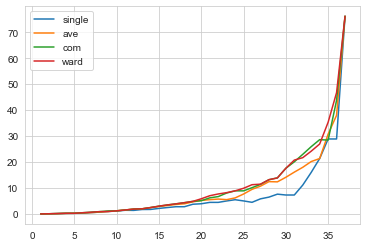

In [61]:
# 作図
## 単連結型
p1 = plt.plot(range(1, len(d_max_mean_list_single)+1), d_max_mean_list_single)
## 群平均型
p2 = plt.plot(range(1, len(d_max_mean_list_ave)+1), d_max_mean_list_ave)
## 完全連結型
p3 = plt.plot(range(1, len(d_max_mean_list_com)+1), d_max_mean_list_com)
## ウォード法
p4 = plt.plot(range(1, len(d_max_mean_list_ward)+1), d_max_mean_list_ward)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ("single", "ave", "com", "ward"))

## おまけ
scipy.cluster.hierarchyのdendrogram関数によって書かれるdendrogramの縦軸が、クラスタリングをする際の基準値になっている。そのため、手法間の比較をしにくい。ここでは、各郡の重心間の距離でdendrogramを書き直し、適切な比較をできるようにする。

In [24]:
# 各群の重心を求める関数
def get_cg_point(data):
    return(data.mean(axis=0))

In [25]:
# linkageの出力のZ-arrayに載っているクラスタを元のクラスタ番号に戻す関数
def z2index(Z, r, E_in, n): 
    """
    Z:linkageの出力
    r：Z内のクラスタ番号。元に戻したいクラスタ
    E_in:ｒより小さいインデックスのクラスタ
    n:クラスタ分析するデータのサンプルサイズ
    """
    
    # rを構成するクラスタを取り出す
    i = r-n
    cluss1,cluss2 = Z[i, 0:2] # cluss1, cluss2がrを構成するクラスタ
    
    # E_inから元のクラスタを取り出し、rのクラスタとする
    cluss1_indexes = np.array(E_in[int(cluss1)])
    cluss2_indexes = np.array(E_in[int(cluss2)])
    new_list = np.concatenate([cluss1_indexes, cluss2_indexes]).flatten().tolist()
    E_in.append(new_list)  # E_inはクラスタ番号が小さい順に作っていくことが前提
    
    return E_in

In [27]:
# linkageの出力であるZ-arrayの距離が何を表しているか考える
## 併合に使う距離である説（つまり、各クラスタ間の距離のmin）
# クラスタ番号と要素の組み合わせを表すリストの初期化
E_ele_list = range(0, len(df))
E = [[e] for e in E_ele_list]

for r in range(len(df), int(Z_single[:, 0:2].max()+1)):
    E = z2index(
            Z = Z_single,
            r = r, 
            E_in = E,
            n = len(df)
        )

In [28]:
# 2つのクラスタの中でデータ間の最短距離をいくつか抽出してみる
# [49.        , 52.        ,  8.66025404, 14.        ]
# クラスタ番号49, 52に含まれるデータの最短距離
print("最短距離", d_matrix[np.ix_(E[49], E[52])].min())
# クラスタ番号49, 52に含まれる重心間の距離
g1 = get_cg_point(df.iloc[E[49]])
g2 = get_cg_point(df.iloc[E[52]])
g1g2_dis = np.sqrt(np.sum((g1-g2)**2))
print("重心間の距離", g1g2_dis)
# →やはり、各クラスタ間の最短距離だった

最短距離 8.660254037844387
重心間の距離 20.578509706205526


In [29]:
# クラスタの重心間の距離でデンドログラムを書き直す
tmp_Z_single_2 = np.empty((1, 4))

# 冪等性保証のための処理
tmp_Z = Z_single.copy()

for z in tmp_Z:
    # 1個目のクラスタに含まれる要素
    clusetr1_ele = E[int(z[0])]
    # 1個目のクラスタの重心
    g1 = get_cg_point(df.iloc[clusetr1_ele])
    
    # 2個目のクラスタに含まれる要素
    clusetr2_ele = E[int(z[1])]
    # 2個目のクラスタの重心
    g2 = get_cg_point(df.iloc[clusetr2_ele])
    
    # 重心間の距離を計算
    g1g2_dis = np.sqrt(np.sum((g1-g2)**2))
    
    # zの距離を重心間の距離に置き換える
    z[2] = g1g2_dis
    
    tmp_Z_single_2 = np.vstack((tmp_Z_single_2, z))
    
Z_single_2 = tmp_Z_single_2[1:len(tmp_Z_single_2)]

In [30]:
Z_single_2

array([[ 4.        ,  7.        ,  2.23606798,  2.        ],
       [12.        , 31.        ,  2.44948974,  2.        ],
       [ 3.        ,  6.        ,  3.        ,  2.        ],
       [14.        , 37.        ,  3.35410197,  3.        ],
       [17.        , 40.        ,  5.03322296,  4.        ],
       [ 9.        , 13.        ,  3.60555128,  2.        ],
       [ 1.        , 10.        ,  5.65685425,  2.        ],
       [15.        , 27.        ,  5.91607978,  2.        ],
       [11.        , 41.        ,  7.88986692,  5.        ],
       [ 5.        , 28.        ,  6.40312424,  2.        ],
       [43.        , 45.        ,  9.58331884,  7.        ],
       [24.        , 25.        ,  7.21110255,  2.        ],
       [47.        , 48.        , 12.01189886,  9.        ],
       [20.        , 35.        ,  7.48331477,  2.        ],
       [ 8.        , 50.        ,  9.89949494,  3.        ],
       [38.        , 51.        , 13.64021831,  5.        ],
       [26.        , 39.

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [5.0, 5.0, 24.375, 24.375],
  [85.0, 85.0, 95.0, 95.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [235.0, 235.0, 253.75, 253.75],
  [220.0, 220.0, 244.375, 244.375],
  [285.0, 285.0, 295.0, 295.0],
  [232.1875, 232.1875, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [261.09375, 261.09375, 321.25, 321.25],
  [192.5, 192.5, 291.171875, 291.171875],
  [162.5, 162.5, 241.8359375, 241.8359375],
  [123.75, 123.75, 202.16796875, 202.16796875],
  [105.0, 105.0, 162.9

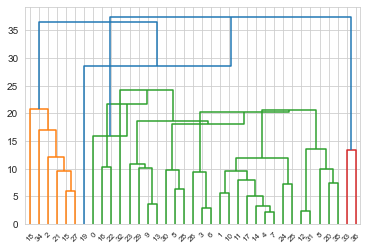

In [31]:
dendrogram(Z_single_2, labels=df.index)

# 分割型アルゴリズム
下記論文の手法を実装
- Macnaughton Smith, P., Williams, W., Dale, M. and Mockett, L. (1965). Dissimilarity analysis: anew technique of hierarchical subdivision, Nature 202:1034-1035.

In [32]:
class MacnaughtonClustering:
    # 初期化関数
    def __init__(self, df):
        self.df = df
        
        # クラス内で必要なlibraryのimport
        import numpy as np
        
    # 距離行列を作成する関数
    def makeDistanceMatrix(self):
        # 各データの組み合わせを作成
        combination_df = self.df-self.df[:, np.newaxis]
        
        # 組み合わせごとに距離を計算
        d_matrix = np.array([[np.linalg.norm(combination_df[i, j]) for i in range(0, len(self.df))] for j in range(0, len(self.df))])
        
        # 出力
        self.d_matrix = d_matrix 
        return(d_matrix)
    
    # クラスタ分割を制御・実行する関数
    def doClustering(self):
        
        # クラスタを分割する関数
        def doClusteringCore(target):
            G1 = target.copy() # 移動元
            G2 = [] # 移動先

            # 移動すべき1個目の点を決める
            tmp_d_matrix = self.d_matrix[np.ix_(G1, G1)]
            maxi = np.argmax(
                np.apply_along_axis(
                    np.mean,
                    axis = 0,
                    arr = tmp_d_matrix)
            )
            
            # cluster1のmiをcluster2に移動するメソッド
            def move(cluster1, cluster2, mi):
                trans_data = cluster1[mi]
                cluster1.remove(trans_data)
                cluster2.append(trans_data)

            # 点の移動
            move(cluster1 = G1, cluster2 = G2, mi = maxi)
    
            while True:
                # 2個目以降の移動すべき点を決める
                ## G1の各点の他の点との平均距離
                tmp_d_matrix = self.d_matrix[np.ix_(G1, G1)]
                G1_mean = np.apply_along_axis(
                    sum,
                    axis = 0,
                    arr = tmp_d_matrix
                )/(len(G1)-1)

                ## G1の各点とG2の各点の平均距離
                tmp_d_matrix = self.d_matrix[np.ix_(G1, G2)]
                d_g1tog2 = np.apply_along_axis(
                    np.mean,
                    axis = 1,
                    arr = tmp_d_matrix
                )

                ## 「G1の各点の他の点との平均距離」-「G1の各点とG2の各点の平均距離」
                criterion = G1_mean-d_g1tog2

                ## 判定条件の作成
                cond = (criterion <= 0)
                tf = all(cond)
                
                # 判定がTrueの場合、while文から抜け出し、分割終了
                # 判定がFalseの場合、点を移動させ分割続行
                if tf:
                    break
                else:
                    maxi = np.argmax(criterion)
                    move(cluster1 = G1, cluster2 = G2, mi = maxi)
                    
            cluster_diff = np.sum(self.d_matrix[np.ix_(G1, G2)])/(len(G1)*len(G2))
            
            # 出力
            return([G1, G2, cluster_diff])
        
        # クラスタリング結果を格納するDataFrame定義
        tmp0_result_DF = pd.DataFrame(columns=["tmp_cluster_no", "cluster", "diff", "children"])

        # 0行目は元のクラスタのインデックスを格納
        tmp0_result_DF.loc[0] = [0, list(range(0, len(self.df))), np.nan, np.nan]

        # パラメータ設定
        count = 0 # 分割回数
        next_clustering = 0 # 次に分割するクラスタのインデックス
        clustering_done = [] # 既に分割したクラスタ

        # 分割前後の処理を実行する関数
        def clusterSupoort(rdf, nc, cd):
            clustered_1 = max(rdf.index)+1
            clustered_2 = max(rdf.index)+2

            # 分割
            if len(rdf.iloc[nc]["cluster"]) >= 3: # クラスタ数が3以上のとき、通常の分割
                cluster1, cluster2, diff = doClusteringCore(target = rdf.iloc[nc]["cluster"])
            else : # クラスタ数が2のときは、一つずつに分割
                cluster1 = [rdf.iloc[nc]["cluster"][0]]
                cluster2 = [rdf.iloc[nc]["cluster"][1]]
                diff = self.d_matrix[np.ix_(cluster1, cluster2)][0, 0]
                
            rdf.loc[nc] = [nc, rdf.loc[nc]["cluster"], diff, [clustered_1, clustered_2]]
            rdf.loc[clustered_1] = [clustered_1, cluster1, np.nan, np.nan]
            rdf.loc[clustered_2] = [clustered_2, cluster2, np.nan, np.nan]
            cd.append(nc)

        # クラスタに含まれる要素の個数で分割の方法を変える
        while (count < len(self.df)-1):    
            if len(tmp0_result_DF.iloc[next_clustering]["cluster"]) >= 2:
                clusterSupoort(rdf = tmp0_result_DF, nc = next_clustering, cd = clustering_done)
                count += 1
            else:
                clustering_done.append(next_clustering)
        
            next_clustering = min([i for i in tmp0_result_DF.index if i not in clustering_done])
        
        # dendrogramに読み込める形に変更する
        tmp0_result_DF["group_n"] = [len(l) for l in tmp0_result_DF["cluster"]]
        
        ## 要素が2個以上のクラスタに対する処理
        tmp1_result_DF = (
            tmp0_result_DF[tmp0_result_DF["group_n"] >= 2]
            .sort_values("diff", ascending=False)
        )
        cluster_n = len(self.df)
        tmp_cluster_no_list = list(range(cluster_n, 2*cluster_n-1))
        tmp_cluster_no_list.reverse()
        tmp1_result_DF["cluster_no"] = tmp_cluster_no_list
        
        ## 要素が1個のクラスタに対する処理
        tmp2_result_DF = (
            tmp0_result_DF[tmp0_result_DF["group_n"] == 1]
        )
        tmp_cluster_no_list = [l[0] for l in tmp2_result_DF["cluster"]]
        tmp2_result_DF["cluster_no"] = tmp_cluster_no_list
        
        ## 要素が2個以上と1個のクラスタに対するresult_DFをunion
        tmp3_result_DF = (
            tmp1_result_DF
            .append(
                other = tmp2_result_DF,
                ignore_index = True
            )
        )
        
        ## childrenから新規に振ったcluster番号を用いてクラスターを表現
        cluster_list = []
        for c in tmp3_result_DF["children"]:
            if isinstance(c, list):
                tmp_series = tmp3_result_DF.loc[tmp3_result_DF["tmp_cluster_no"] == c[0], "cluster_no"]
                c0 = tmp_series.iloc[-1]
                tmp_series = tmp3_result_DF.loc[tmp3_result_DF["tmp_cluster_no"] == c[1], "cluster_no"]
                c1 = tmp_series.iloc[-1]
                
                cluster_list.append([c0, c1])
            else:
                cluster_list.append(np.isnan)
        
        tmp3_result_DF["cluster_list"] = cluster_list
        
        ## 必要なカラムだけ抜き出し、少し処理
        tmp_linkage_Z = (
            tmp3_result_DF[1<tmp3_result_DF["group_n"]]
            .sort_values("cluster_no", ascending=True)
        )
        
        tmp_Z = []
        for i in tmp_linkage_Z[["cluster_list", "diff", "group_n"]].itertuples():
            i0, i1 = i.cluster_list
            d = i.diff
            n = i.group_n
            tmp_Z.append([i0, i1, d, n])
            
        Z = np.array(tmp_Z)
        
        return(Z)

In [33]:
# テスト用データ作成
test_data = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5],
    [6, 6],
    [7, 7],
    [9, 9]
])

In [34]:
# 動かしてみる
test_class = MacnaughtonClustering(df = test_data)
print(test_class.makeDistanceMatrix())
result = test_class.doClustering()
# デンドログラム作成
hierarchy.dendrogram(result)

[[ 0.          1.41421356  2.82842712  4.24264069  5.65685425  7.07106781
   8.48528137 11.3137085 ]
 [ 1.41421356  0.          1.41421356  2.82842712  4.24264069  5.65685425
   7.07106781  9.89949494]
 [ 2.82842712  1.41421356  0.          1.41421356  2.82842712  4.24264069
   5.65685425  8.48528137]
 [ 4.24264069  2.82842712  1.41421356  0.          1.41421356  2.82842712
   4.24264069  7.07106781]
 [ 5.65685425  4.24264069  2.82842712  1.41421356  0.          1.41421356
   2.82842712  5.65685425]
 [ 7.07106781  5.65685425  4.24264069  2.82842712  1.41421356  0.
   1.41421356  4.24264069]
 [ 8.48528137  7.07106781  5.65685425  4.24264069  2.82842712  1.41421356
   0.          2.82842712]
 [11.3137085   9.89949494  8.48528137  7.07106781  5.65685425  4.24264069
   2.82842712  0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
<ipython-input-32-1fe58bd914ad>:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2_result_DF["cluster_no"] = tmp_cluster_no_list


NameError: name 'hierarchy' is not defined

In [ ]:
G1

In [ ]:
basobi = pd.DataFrame(columns=["a", "b", "c", "d"])
def asobi(df):
    df.loc[0] = [0,0,0,0]
    df.loc[1] = [1,1,1,1]

asobi(df = basobi)
print(basobi)

In [ ]:
basobi.loc[0]["a"]

In [ ]:
tmp0_result_DF = pd.DataFrame(columns=["tmp_cluster_no", "cluster", "diff", "children"])
tmp0_result_DF.loc[0] = [0, list(range(0, len(test_data))), np.nan, np.nan]

In [ ]:
tmp0_result_DF

In [ ]:
test_data

In [ ]:
result_DF_new[c[0]]["cluster_no_2"]

In [ ]:
basobi = list(set(asobi))
basobi.remove(np.nan)

In [ ]:
[np.nan]+basobi

In [ ]:
def doClusteringCore(target, df):
        G1 = target.copy() # 移動元
        G2 = [] # 移動先

        # 移動すべき1個目の点を決める
        tmp_d_matrix = test_d_matrix[np.ix_(G1, G1)]
        maxi = np.argmax(np.apply_along_axis(np.mean, axis=0, arr=tmp_d_matrix))

        #移動すべき点
        trans_data = G1[maxi]
        G1.remove(trans_data)
        G2.append(trans_data)

        while True:
            # 2個目以降の移動すべき点を決める
            ## G1の各点の他の点との平均距離
            tmp_d_matrix = self.d_matrix[np.ix_(G1, G1)]
            G1_mean = np.apply_along_axis(sum, axis = 0, arr = tmp_d_matrix)/(len(G1)-1)

            ## G1の各点とG2の各点の平均距離
            tmp_d_matrix = test_d_matrix[np.ix_(G1, G2)]
            d_g1tog2 = np.apply_along_axis(np.mean, axis=1, arr=d_matrix[np.ix_(G1, G2)])

            ## 「G1の各点の他の点との平均距離」-「G1の各点とG2の各点の平均距離」
            criterion = G1_mean-d_g1tog2

            ## 判定条件の作成
            cond = (criterion < 0)
            tf = all(cond)

            if tf:
                break
            else:
                maxi = np.argmax(criterion)
                trans_data = G1[maxi]
                G1.remove(trans_data)
                G2.append(trans_data)

        return([G1, G2])


In [ ]:
G1 = [0, 1, 3]
G2 = [2, 4]
d_matrix[np.ix_(G1, G2)]

In [ ]:
np.apply_along_axis(np.mean, axis=1, arr=d_matrix[np.ix_(G1, G2)])

In [ ]:
i_max = np.argmax(np.apply_along_axis(np.mean, axis=1, arr=d_matrix[np.ix_(G1, G2)]))

In [ ]:
G1[i_max]

In [ ]:
a = not all([True, True, True])

In [ ]:
a

In [ ]:
test = MacnaughtonClustering(data)
test.doClustering()

In [ ]:
data

In [ ]:
list(range(0, len(data)))

In [ ]:
np.apply_along_axis(sum, axis=0, arr = d_matrix[np.ix_([0, 1], [0, 1])])/10

In [ ]:
for p in parent_list:
        if len(tmp_Z[tmp_Z["parent"] == p]) == 2:
            parent_list.remove(p)

In [ ]:
[list(test1[test1["parent"] == 1]["cluster_no"])[1]]

In [ ]:
test1

In [ ]:
#list(test1[test1["parent"] == 1]["Z_index"])[0]==-1
test1 = changeFmt(tmp=test_data, cp=cp)

In [ ]:
test1

In [ ]:
np.nan

In [ ]:
test = MacnaughtonClustering(df = data)
test.doClustering(tmp=test_data, cp=cp)

In [ ]:
print(test.makeDistanceMatrix())
test.d_matrix

In [ ]:
data = np.array([
    [1,1,1],
    [2,2,2],
    [0,1,0],
    [4,5,1],
    [1,2,3]
])

# 各データの組み合わせを作成
combination_df = data-data[:, np.newaxis]
        
# 組み合わせごとに距離を計算
d_matrix = np.array([[np.linalg.norm(combination_df[i, j]) for i in range(0, len(data))] for j in range(0, len(data))])

In [ ]:
tmp_i = np.argmax(np.apply_along_axis(sum, axis=0, arr=d_matrix[np.ix_([0, 2, 4], [0, 2, 4])]))

In [ ]:
np.apply_along_axis(sum, axis=0, arr=d_matrix[np.ix_([0, 2, 4], [0, 2, 4])])

In [ ]:
[0,2,4][tmp_i]

In [ ]:
# irisデータ
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()
iris.keys()

df_iris = iris.data
df_target = iris.target
target_names = iris.target_names
df_labels = target_names[df_target]

# データの正規化（平均0, 標準偏差1）
scaler = StandardScaler()
df_iris_std = scaler.fit_transform(df_iris)

In [ ]:
# 距離計算
dist = hierarchy.distance.pdist(df_iris_std, metric='euclidean')

# クラスタリング
linkage = hierarchy.linkage(dist, method='ward')

# デンドログラム
fig, ax = plt.subplots(figsize=(5,13))
ax = hierarchy.dendrogram(Z=linkage,
                          orientation='right',
                          labels=df_labels)
fig.show()

In [ ]:
type(linkage)

In [ ]:
test1 = [1,2,3,4]
test2 = test1.copy()
test2.remove(1)
print(test1)
print(test2)

In [ ]:
sample = np.array([[0, 1, 0.1, 2],
                   [2, 3, 0.2, 2],
                   [4, 5, 0.3, 4],
                   ])
type(sample)
hierarchy.dendrogram(sample)

In [ ]:
# クラスタリング
linkage = hierarchy.linkage(dist, method='single')

# デンドログラム
fig, ax = plt.subplots(figsize=(5,13))
ax = hierarchy.dendrogram(Z=linkage,
                orientation='right',
                         labels=df_labels)
fig.show()


hierarchy.fcluster(linkage, t=1.0 , criterion="distance")

In [ ]:
# クラスタリング
linkage = hierarchy.linkage(dist, method='complete')

# デンドログラム
fig, ax = plt.subplots(figsize=(5,13))
ax = hierarchy.dendrogram(Z=linkage,
                orientation='right')
fig.show()

In [ ]:
# クラスタリング
linkage = hierarchy.linkage(dist, method='average')

# デンドログラム
fig, ax = plt.subplots(figsize=(5,13))
ax = hierarchy.dendrogram(Z=linkage,
                orientation='right')
fig.show()

In [ ]:
#基礎計算系のライブラリ
import numpy as np
from scipy import stats 
from math import pi, cos, sin
import pandas as pd

#クラスタリングに用いるライブラリ
from sklearn.cluster import KMeans
from pyclustering.cluster import kmeans, kmedoids, xmeans, dbscan
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer 
from kneed import KneeLocator

# 乱数発生に使うライブラリ
import random

#散布図の表示などに用いるライブラリ
import matplotlib.colors as plc 
import matplotlib.pyplot as plt 
from IPython.display import display, HTML 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [ ]:
data = np.array(
    [
        [0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]
    ]
)

In [ ]:
d_matrix = np.array(
    [list(np.zeros(i))+[np.linalg.norm(data[i]-data[j]) for j in range(i+1, len(data))] for i in range(0, len(data)-1)]
)

In [ ]:
d_matrix

In [ ]:
data[:, np.newaxis]

In [ ]:
data[0]-data[:, np.newaxis][1]

In [ ]:
# 距離の計算(最終版)
d_matrix = np.array([[np.linalg.norm((data-data[:, np.newaxis])[i, j]) for i in range(0, len(data))] for j in range(0, len(data))])

In [ ]:
d_matrix

In [ ]:
(data-data[:, np.newaxis])[0, 0]

In [ ]:
G_1 = [0]
G_2 = [1, 2, 3, 4, 5, 6, 7]

In [ ]:
d_matrix_df = pd.DataFrame(d_matrix)

In [ ]:
d_matrix_df

In [ ]:
d_matrix_df.iloc[1][0]-np.mean(d_matrix_df.iloc[1][2:8])

In [ ]:
G_1 = [0, 1, 2, 3]

for i in [4, 5, 6, 7]:
    a = list(d_matrix_df.columns)
    for g1 in G_1:
        a.remove(g1)
    
    a.remove(i)
    print(i, np.mean(d_matrix_df.iloc[i][g1])-np.mean(d_matrix_df.iloc[i][a]))

In [ ]:
G_1 = [0, 1, 2, 3]

In [ ]:
get_cg_point

cluster_single

In [ ]:
get_cg_point(df[cluster_single == 1])